訓練模型

In [44]:
import pandas as pd
import numpy as np

source_df = pd.read_csv(f"..//Data//PreparedData//L1_Processed_Train.csv")
print(source_df.dtypes)
source_df

Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minute                   int64
Avg_WindSpeed(m/s)     float64
Avg_Pressure(hpa)      float64
Avg_Temperature(°C)    float64
Avg_Humidity(%)        float64
Avg_Sunlight(Lux)      float64
Avg_Power(mW)          float64
Max_WindSpeed(m/s)     float64
Max_Pressure(hpa)      float64
Max_Temperature(°C)    float64
Max_Humidity(%)        float64
Max_Sunlight(Lux)      float64
Max_Power(mW)          float64
Min_WindSpeed(m/s)     float64
Min_Pressure(hpa)      float64
Min_Temperature(°C)    float64
Min_Humidity(%)        float64
Min_Sunlight(Lux)      float64
Min_Power(mW)          float64
Med_WindSpeed(m/s)     float64
Med_Pressure(hpa)      float64
Med_Temperature(°C)    float64
Med_Humidity(%)        float64
Med_Sunlight(Lux)      float64
Med_Power(mW)          float64
dtype: object


,Year,Month,Day,Hour,Minute,Avg_WindSpeed(m/s),Avg_Pressure(hpa),Avg_Temperature(°C),Avg_Humidity(%),Avg_Sunlight(Lux),...,Min_Temperature(°C),Min_Humidity(%),Min_Sunlight(Lux),Min_Power(mW),Med_WindSpeed(m/s),Med_Pressure(hpa),Med_Temperature(°C),Med_Humidity(%),Med_Sunlight(Lux),Med_Power(mW)
0,2024,1,1,6,30,0.0,1016.54,17.50,86.78,50.09,...,17.5,86.7,25.00,0.00,0.0,1016.54,17.50,86.8,45.83,0.00
1,2024,1,1,6,40,0.0,1016.59,17.49,86.80,163.25,...,17.4,86.7,100.83,0.00,0.0,1016.60,17.50,86.8,157.92,0.02
2,2024,1,1,6,50,0.0,1016.66,17.50,86.95,326.83,...,17.5,86.9,251.67,0.03,0.0,1016.66,17.50,86.9,321.25,0.04
3,2024,1,1,7,0,0.0,1016.73,17.50,86.99,470.83,...,17.5,86.9,415.83,0.07,0.0,1016.74,17.50,87.0,469.58,0.08
4,2024,1,1,7,10,0.0,1016.77,17.57,86.97,659.67,...,17.5,86.5,570.83,0.10,0.0,1016.76,17.60,87.1,621.66,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,2024,7,24,17,40,0.0,961.30,25.22,100.00,91.25,...,25.1,100.0,50.00,0.00,0.0,961.34,25.20,100.0,98.75,0.00
10621,2024,7,24,17,50,0.0,961.06,24.91,100.00,54.00,...,24.8,100.0,45.00,0.00,0.0,960.99,24.90,100.0,50.42,0.00
10622,2024,7,24,18,0,0.0,960.91,24.76,100.00,37.25,...,24.7,100.0,30.83,0.00,0.0,960.90,24.80,100.0,37.08,0.00
10623,2024,7,24,18,10,0.0,959.86,24.97,100.00,40.33,...,24.8,100.0,23.33,0.00,0.0,960.00,25.00,100.0,40.42,0.00


In [45]:
# 計算缺失數值
missing_counts = source_df.isna().sum()
missing_counts

Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
Avg_WindSpeed(m/s)     0
Avg_Pressure(hpa)      0
Avg_Temperature(°C)    0
Avg_Humidity(%)        0
Avg_Sunlight(Lux)      0
Avg_Power(mW)          0
Max_WindSpeed(m/s)     0
Max_Pressure(hpa)      0
Max_Temperature(°C)    0
Max_Humidity(%)        0
Max_Sunlight(Lux)      0
Max_Power(mW)          0
Min_WindSpeed(m/s)     0
Min_Pressure(hpa)      0
Min_Temperature(°C)    0
Min_Humidity(%)        0
Min_Sunlight(Lux)      0
Min_Power(mW)          0
Med_WindSpeed(m/s)     0
Med_Pressure(hpa)      0
Med_Temperature(°C)    0
Med_Humidity(%)        0
Med_Sunlight(Lux)      0
Med_Power(mW)          0
dtype: int64

                     Med_Power(mW)  Med_Sunlight(Lux)  Med_Humidity(%)  \
Med_Power(mW)             1.000000           0.958176        -0.665940   
Med_Sunlight(Lux)         0.958176           1.000000        -0.746976   
Med_Humidity(%)          -0.665940          -0.746976         1.000000   
Med_Temperature(°C)       0.589508           0.693466        -0.820431   
Med_Pressure(hpa)         0.013305           0.000772         0.042206   
Med_WindSpeed(m/s)        0.169441           0.139692        -0.053847   
Min_Power(mW)             0.921379           0.883838        -0.616477   
Min_Sunlight(Lux)         0.916056           0.958107        -0.724085   
Min_Humidity(%)          -0.664834          -0.747718         0.998649   
Min_Temperature(°C)       0.587721           0.689937        -0.818501   
Min_Pressure(hpa)         0.005511          -0.027180         0.147105   
Min_WindSpeed(m/s)        0.109772           0.086031        -0.045218   
Max_Power(mW)             0.929664    

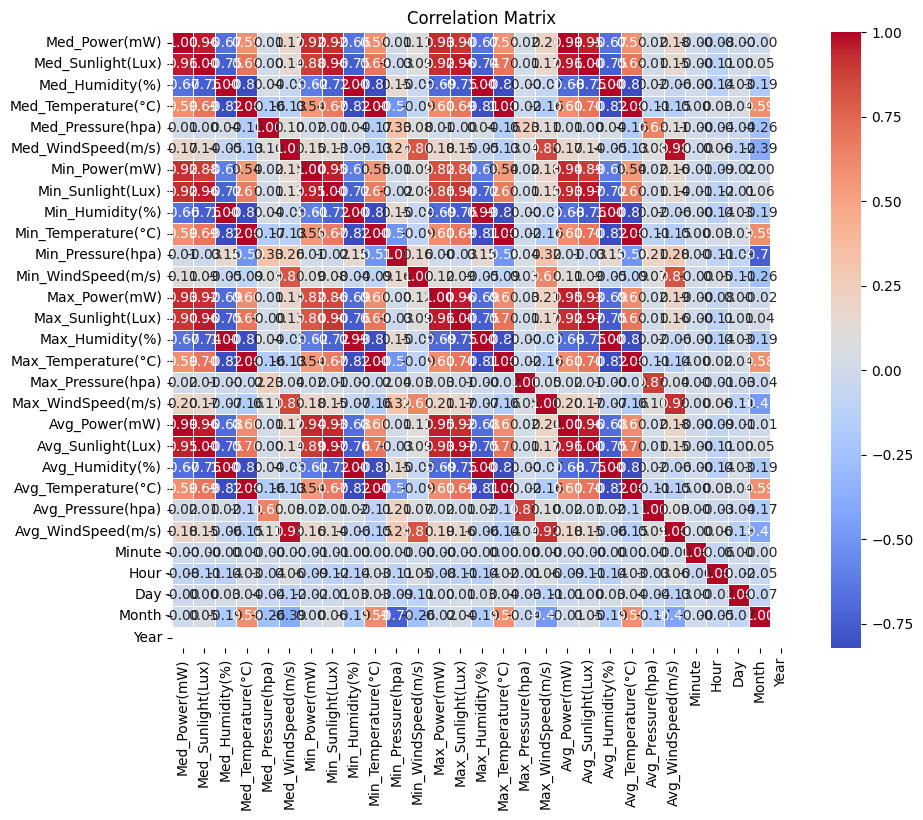

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = source_df.corr().iloc[::-1, ::-1]
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [47]:
to_predict_features = 'Avg_Power(mW)'

correlation_df = pd.DataFrame(correlation_matrix)
filtered_df = correlation_df[correlation_df[to_predict_features].abs() >= 0.50]

print(filtered_df[to_predict_features].sort_values(ascending=False))

all_features = filtered_df[to_predict_features].sort_values(ascending=False).index.to_list()
selected_features = filtered_df[to_predict_features].drop(to_predict_features).sort_values(ascending=False).index.to_list()
selected_features

Avg_Power(mW)          1.000000
Med_Power(mW)          0.993775
Med_Sunlight(Lux)      0.960096
Avg_Sunlight(Lux)      0.960093
Max_Power(mW)          0.951531
Min_Power(mW)          0.935204
Min_Sunlight(Lux)      0.931281
Max_Sunlight(Lux)      0.921602
Max_Temperature(°C)    0.599966
Avg_Temperature(°C)    0.599511
Med_Temperature(°C)    0.599456
Min_Temperature(°C)    0.597417
Min_Humidity(%)       -0.679066
Max_Humidity(%)       -0.679213
Med_Humidity(%)       -0.680152
Avg_Humidity(%)       -0.680356
Name: Avg_Power(mW), dtype: float64


['Med_Power(mW)',
 'Med_Sunlight(Lux)',
 'Avg_Sunlight(Lux)',
 'Max_Power(mW)',
 'Min_Power(mW)',
 'Min_Sunlight(Lux)',
 'Max_Sunlight(Lux)',
 'Max_Temperature(°C)',
 'Avg_Temperature(°C)',
 'Med_Temperature(°C)',
 'Min_Temperature(°C)',
 'Min_Humidity(%)',
 'Max_Humidity(%)',
 'Med_Humidity(%)',
 'Avg_Humidity(%)']

In [ ]:
from sklearn.model_selection import train_test_split

X = source_df[selected_features]
y = pd.DataFrame(source_df[to_predict_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


,Avg_Power(mW)
7326,4.330207
2945,2.500616
9475,0.207014
6120,3.340031
6474,3.778949
...,...
9307,7.063373
5421,0.182322
2978,7.472785
6670,5.032462


In [49]:
# Build LinearRegression Model

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled_df

,Med_Power(mW),Med_Sunlight(Lux),Avg_Sunlight(Lux),Max_Power(mW),Min_Power(mW),Min_Sunlight(Lux),Max_Sunlight(Lux),Max_Temperature(°C),Avg_Temperature(°C),Med_Temperature(°C),Min_Temperature(°C),Min_Humidity(%),Max_Humidity(%),Med_Humidity(%),Avg_Humidity(%)
0,-0.430527,0.099246,0.101426,-0.491583,-0.351316,0.240176,0.002702,0.971931,1.010550,1.010215,1.049492,-0.812825,-0.873128,-0.835022,-0.840880
1,-0.571536,-0.708678,-0.705621,-0.562184,-0.521411,-0.711151,-0.632581,-1.116344,-1.120031,-1.122510,-1.108893,1.062935,1.020460,1.041967,1.042588
2,-0.585466,-0.834482,-0.846888,-0.634397,-0.529834,-0.815185,-0.856942,-0.534036,-0.536086,-0.545960,-0.517413,1.062935,1.020460,1.041967,1.042588
3,-0.540185,-0.550019,-0.534596,-0.517960,-0.499613,-0.577103,-0.403863,-0.273002,-0.252281,-0.244929,-0.237238,1.062935,1.020460,1.041967,1.042588
4,-0.499881,-0.419927,-0.420172,-0.531847,-0.453604,-0.393881,-0.422323,-0.283042,-0.281887,-0.285747,-0.257992,-0.269238,-0.234091,-0.230666,-0.236573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2.154726,2.129093,1.894011,1.957656,1.400218,1.559954,2.033029,1.664676,1.692499,1.688810,1.744741,-1.367897,-1.441597,-1.398700,-1.401773
8496,-0.585508,-0.855894,-0.867816,-0.634379,-0.529908,-0.836605,-0.873689,-0.584235,-0.571817,-0.571471,-0.558920,1.062935,1.020460,1.041967,1.042588
8497,3.601925,3.137605,2.677760,3.324032,1.362239,1.469807,2.656853,0.510101,0.353102,0.336723,0.240097,-0.962121,-0.869208,-0.869889,-0.890884
8498,-0.288555,-0.089104,-0.085461,-0.175564,-0.324371,-0.147980,-0.011905,0.339425,0.219366,0.204066,0.136329,-0.414705,-0.214489,-0.294589,-0.300144


In [50]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train_scaled_df, y_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_pred = regression_model.predict(X_test_scaled_df).round(2)
# y_pred = np.expm1(y_pred) # 對數變換
y_pred = np.clip(y_pred, 0, None) # 負數改成0

In [51]:
y_pred_df = pd.DataFrame(y_pred,columns=y_test.columns)
y_test_df = pd.DataFrame(y_test,columns=y_test.columns).reset_index(drop=True)
print("Prediction\n",y_pred_df)
print("Ture\n",y_test_df)

Prediction
       Avg_Power(mW)
0              8.22
1            141.45
2           1212.72
3           1441.69
4              8.51
...             ...
2120          53.23
2121          21.60
2122         102.84
2123          63.28
2124         137.47

[2125 rows x 1 columns]
Ture
       Avg_Power(mW)
0              0.07
1            126.89
2           1153.62
3           1375.81
4              0.04
...             ...
2120          39.54
2121          12.65
2122          95.24
2123          51.71
2124         118.12

[2125 rows x 1 columns]


In [52]:
error = abs(y_test_df[to_predict_features] - y_pred_df[to_predict_features])
print(error.sum()) # 差距總和
error.describe()

42444.76


count    2125.000000
mean       19.974005
std        21.046782
min         0.130000
25%         8.440000
50%        10.280000
75%        21.030000
max       232.340000
Name: Avg_Power(mW), dtype: float64

In [53]:
LookBackNum = 12
n_features = len(selected_features)

LSTM_X = source_df[selected_features]
LSTM_y = pd.DataFrame(source_df[to_predict_features])

In [54]:
LSTM_X_train_df, LSTM_X_test_df, LSTM_y_train_df, LSTM_y_test_df = train_test_split(LSTM_X, LSTM_y, test_size=0.2, shuffle=True)

In [55]:
LSTM_X_train_df.reset_index(drop=True,inplace=True)
LSTM_X_test_df.reset_index(drop=True,inplace=True)
LSTM_y_train_df.reset_index(drop=True,inplace=True)
LSTM_y_test_df.reset_index(drop=True,inplace=True)

In [56]:
# LSTM_X_train_to_pred_df = pd.DataFrame(LSTM_X_train_df[to_predict_features])
# LSTM_X_train_to_pred_df

In [57]:
# # LSTM_X_test_to_pred_df = pd.DataFrame(LSTM_X_test_df[to_predict_features])
# LSTM_X_test_to_pred_df

In [58]:
LSTM_X_train_scaled = scaler.fit_transform(LSTM_X_train_df)
LSTM_X_train_scaled_df = pd.DataFrame(LSTM_X_train_scaled,columns=LSTM_X_train_df.columns)
LSTM_X_train_scaled_df

,Med_Power(mW),Med_Sunlight(Lux),Avg_Sunlight(Lux),Max_Power(mW),Min_Power(mW),Min_Sunlight(Lux),Max_Sunlight(Lux),Max_Temperature(°C),Avg_Temperature(°C),Med_Temperature(°C),Min_Temperature(°C),Min_Humidity(%),Max_Humidity(%),Med_Humidity(%),Avg_Humidity(%)
0,0.573681,0.583746,0.416165,0.629500,-0.225869,0.011936,0.559488,0.960771,0.895376,0.867738,0.883948,-1.176081,-1.126762,-1.132839,-1.141947
1,-0.587818,-0.817109,-0.830768,-0.638476,-0.529754,-0.790801,-0.847842,-1.307189,-1.300489,-1.301689,-1.286259,1.057907,1.010771,1.037164,1.037112
2,-0.520376,-0.474504,-0.444347,-0.508191,-0.467408,-0.451566,-0.358779,-1.526992,-1.525159,-1.525236,-1.523949,1.057907,1.010771,1.037164,1.037112
3,-0.582184,-0.720457,-0.733074,-0.632278,-0.523808,-0.683244,-0.760942,0.331337,0.364708,0.364756,0.398235,0.043844,0.035279,0.039927,0.039791
4,0.218876,0.398490,0.450151,0.311516,0.357499,0.562072,0.443368,1.460322,1.492123,1.482493,1.535010,-1.286636,-1.348288,-1.319941,-1.319035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,-0.482009,-0.302747,-0.267196,-0.482700,-0.421789,-0.241198,-0.240594,0.730978,0.653424,0.634029,0.625590,1.057907,1.010771,1.037164,1.037112
8496,-0.464413,-0.301526,-0.333653,-0.524492,-0.446511,-0.353469,-0.372539,-1.317180,-1.355386,-1.357576,-1.379268,0.771987,1.010771,0.987013,0.931786
8497,-0.558512,-0.574620,-0.581112,-0.610226,-0.498840,-0.520246,-0.616267,-0.358043,-0.343865,-0.346532,-0.325168,1.057907,1.010771,1.037164,1.037112
8498,-0.587650,-0.808095,-0.817472,-0.636792,-0.529976,-0.789509,-0.818967,-0.258133,-0.395712,-0.427822,-0.438845,1.057907,1.010771,1.037164,1.037112


In [59]:
LSTM_X_test_scaled = scaler.fit_transform(LSTM_X_test_df)
LSTM_X_test_scaled_df = pd.DataFrame(LSTM_X_test_scaled,columns=LSTM_X_test_df.columns)
LSTM_X_test_scaled_df

,Med_Power(mW),Med_Sunlight(Lux),Avg_Sunlight(Lux),Max_Power(mW),Min_Power(mW),Min_Sunlight(Lux),Max_Sunlight(Lux),Max_Temperature(°C),Avg_Temperature(°C),Med_Temperature(°C),Min_Temperature(°C),Min_Humidity(%),Max_Humidity(%),Med_Humidity(%),Avg_Humidity(%)
0,-0.546148,-0.742960,-0.754790,-0.594782,-0.499133,-0.711468,-0.780713,-0.361837,-0.340919,-0.339105,-0.317869,0.342176,0.319142,0.335120,0.332035
1,0.376100,0.708727,0.696707,0.362952,0.441815,0.809991,0.644045,1.158942,1.167010,1.164503,1.186408,-1.042247,-1.108083,-1.064055,-1.072188
2,-0.527604,-0.605290,-0.625356,-0.575683,-0.487637,-0.609564,-0.640509,-0.910145,-0.905864,-0.908894,-0.898091,0.909241,1.010643,0.955435,0.959175
3,-0.398989,-0.226398,-0.208534,-0.404161,-0.347336,-0.165451,-0.205956,0.176126,0.193403,0.193752,0.197883,-0.479092,-0.480908,-0.479414,-0.480748
4,2.327121,1.795556,1.810279,1.974499,2.817301,2.116233,1.536019,-0.041129,-0.007231,-0.001453,0.015221,-1.167393,-1.172408,-1.179002,-1.174529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,-0.364485,-0.216086,-0.109310,0.821924,-0.459339,-0.448051,0.709544,1.396887,1.304286,1.333330,1.132684,-1.288628,-1.164367,-1.264220,-1.248707
2121,-0.548990,-0.774337,-0.786051,-0.597539,-0.502720,-0.744736,-0.805602,-0.806691,-0.799211,-0.798102,-0.790642,1.050030,1.010643,1.030744,1.031370
2122,0.075606,0.437280,0.435595,0.056366,0.121799,0.515204,0.366746,1.365850,1.306398,1.306950,1.250877,-1.022693,-0.931187,-0.955054,-0.963896
2123,-0.551660,-0.829842,-0.841343,-0.599853,-0.505474,-0.807177,-0.853845,-1.448108,-1.442298,-1.436476,-1.435333,1.050030,1.010643,1.030744,1.031370


In [60]:
# Build LSTM Model
LSTM_X_train = []
LSTM_y_train = []

for i in range(LookBackNum,len(LSTM_X_train_scaled_df)):
    LSTM_X_train.append(LSTM_X_train_scaled_df.iloc[i-LookBackNum:i, :])
    LSTM_y_train.append(LSTM_X_train_scaled_df.iloc[i, :])

In [61]:
LSTM_X_train = np.array(LSTM_X_train)
LSTM_y_train = np.array(LSTM_y_train)
# samples, timesteps, features
LSTM_X_train = np.reshape(LSTM_X_train, (LSTM_X_train.shape[0], LSTM_X_train.shape[1], n_features))
LSTM_X_train.shape

(8488, 12, 15)

In [62]:
LSTM_X_test = []
LSTM_y_test = []

for i in range(LookBackNum,len(LSTM_X_test_scaled_df)):
    LSTM_X_test.append(LSTM_X_test_scaled_df.iloc[i-LookBackNum:i, :])
    LSTM_y_test.append(LSTM_X_test_scaled_df.iloc[i, :])    


In [63]:
LSTM_X_test = np.array(LSTM_X_test)
LSTM_y_test = np.array(LSTM_y_test)

# samples, timesteps, features
LSTM_X_test = np.reshape(LSTM_X_test, (LSTM_X_test.shape[0], LSTM_X_test.shape[1], n_features))
LSTM_X_test.shape

(2113, 12, 15)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# many to many
LSTM_model = Sequential()

LSTM_model.add(LSTM(
    units = 128, 
    activation='relu',
    input_shape = (LSTM_X_train.shape[1], LSTM_X_train.shape[2])
    ))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(units = 64, activation='relu'))
LSTM_model.add(Dropout(0.2))

# output layer
LSTM_model.add(Dense(units = LSTM_X_train.shape[2]))

optimizer = Adam(learning_rate=0.001)

LSTM_model.compile(
    optimizer = 'adam', 
    loss = 'mean_squared_error')


LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               73728     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                975       
                                                                 
Total params: 82,959
Trainable params: 82,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 使用 EarlyStopping 回調來提前終止訓練
early_stopping = EarlyStopping(
    monitor='loss',  # 可以是 'val_loss' 或者 'loss'，取決於你是監控訓練集還是驗證集的損失
    patience=10,     # 若損失在10個epoch內不改善，則停止訓練
    restore_best_weights=True,  # 訓練停止後恢復模型的最佳權重
    verbose=1
)

# 使用 ReduceLROnPlateau 回調來自動調整學習率
lr_reducer = ReduceLROnPlateau(
    monitor='loss',  # 監控指標
    factor=0.5,      # 當監控指標停止改善時，將學習率縮小為原來的一半
    patience=5,      # 等待 5 個epoch後，若損失不改善，則減小學習率
    min_lr=0.0001,   # 最小學習率
    verbose=1
)

LSTM_model.fit(
    LSTM_X_train,
    LSTM_y_train, 
    epochs = 100, 
    batch_size = 128,
    )

Epoch 1/100
67/67 [==============================] - 2s 22ms/step - loss: 1.0019
Epoch 2/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0003
Epoch 3/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0002
Epoch 4/100
67/67 [==============================] - 1s 21ms/step - loss: 1.0001
Epoch 5/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0000
Epoch 6/100
67/67 [==============================] - 1s 20ms/step - loss: 0.9999
Epoch 7/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0000
Epoch 8/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0000
Epoch 9/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0002
Epoch 10/100
67/67 [==============================] - 1s 21ms/step - loss: 0.9999
Epoch 11/100
67/67 [==============================] - 1s 21ms/step - loss: 0.9997
Epoch 12/100
67/67 [==============================] - 1s 20ms/step - loss: 1.0000
Epoch 13/100
67/67 [=====

In [ ]:
LSTM_model.evaluate(LSTM_X_test,LSTM_y_test)
LSTM_pred = LSTM_model.predict(LSTM_X_test)

67/67 [==============================] - 0s 3ms/step


In [ ]:
pd.DataFrame(LSTM_y_test,columns=LSTM_X_test_df.columns)

,Avg_Sunlight(Lux),Max_Power(mW),Min_Power(mW),Min_Sunlight(Lux),Max_Sunlight(Lux),Max_Temperature(°C),Avg_Temperature(°C),Min_Temperature(°C),Min_Humidity(%),Max_Humidity(%),Avg_Humidity(%)
0,-0.627443,-0.578823,-0.510443,-0.641136,-0.565530,-1.467320,-1.457127,-1.454727,1.043607,1.005225,1.024987
1,0.352627,2.992246,-0.249055,0.047664,0.767888,0.455604,0.482756,0.504106,-1.030045,-1.099265,-1.061677
2,-0.662011,-0.600381,-0.503598,-0.620217,-0.662517,0.277188,0.193387,0.134902,-0.746243,-0.614806,-0.678975
3,-0.733640,-0.622011,-0.519066,-0.689045,-0.747825,0.287100,0.320427,0.360527,-0.053764,-0.083839,-0.066805
4,-0.676179,-0.614162,-0.510467,-0.635099,-0.705877,0.495252,0.527120,0.565640,-0.345135,-0.382266,-0.360631
...,...,...,...,...,...,...,...,...,...,...,...
2114,-0.612718,-0.600041,-0.492052,-0.571824,-0.644734,-1.754767,-1.768678,-1.782908,1.043607,1.005225,1.024987
2115,0.385305,0.050287,0.031478,0.387286,0.348488,1.179178,1.187527,1.222003,-0.659210,-0.529541,-0.612701
2116,-0.781946,-0.621850,-0.523133,-0.775888,-0.770728,-0.000347,0.024000,0.042601,1.043607,1.005225,1.024987
2117,-0.667291,-0.614431,-0.508251,-0.617408,-0.698966,-1.160048,-1.151625,-1.136801,0.850622,0.931587,0.892440


In [ ]:
pd.DataFrame(LSTM_pred,columns=LSTM_X_test_df.columns)

,Avg_Sunlight(Lux),Max_Power(mW),Min_Power(mW),Min_Sunlight(Lux),Max_Sunlight(Lux),Max_Temperature(°C),Avg_Temperature(°C),Min_Temperature(°C),Min_Humidity(%),Max_Humidity(%),Avg_Humidity(%)
0,-0.364898,-0.390437,-0.266244,-0.298391,-0.366305,-0.295990,-0.313952,-0.326382,0.347781,0.381778,0.374903
1,-0.272471,-0.320185,-0.182296,-0.228319,-0.292932,-0.080608,-0.073277,-0.071190,0.182225,0.178684,0.189139
2,-1.269884,-1.345648,-1.275251,-1.239598,-1.204737,-0.246796,-0.277348,-0.292285,0.493948,0.567306,0.533094
3,-0.447276,-0.497041,-0.355995,-0.396074,-0.450243,-0.128789,-0.128872,-0.136251,0.423710,0.447901,0.437646
4,0.819385,0.745208,0.611686,0.796314,0.880380,1.262991,1.249941,1.246949,-1.249192,-1.246117,-1.242151
...,...,...,...,...,...,...,...,...,...,...,...
2114,0.389056,0.425790,0.375907,0.357433,0.398806,0.295975,0.295482,0.280453,-0.372435,-0.366118,-0.364060
2115,2.567504,2.393840,2.233552,2.503915,2.571822,2.743854,2.744798,2.733765,-2.900698,-2.882943,-2.887389
2116,1.060372,1.033055,0.892147,1.028848,1.106134,1.174012,1.173532,1.165745,-1.216954,-1.204761,-1.208132
2117,0.424375,0.411563,0.418374,0.430258,0.439614,0.393800,0.401018,0.395818,-0.386693,-0.381254,-0.382372


In [ ]:
reg_X_train = pd.DataFrame(LSTM_X_train_scaled_df)
reg_y_train = pd.DataFrame(LSTM_y_train_df)
reg_X_test = pd.DataFrame(LSTM_X_test_scaled_df)
reg_y_test = pd.DataFrame(LSTM_y_test_df)

In [ ]:
reg_model = LinearRegression()
reg_model.fit(reg_X_train,reg_y_train)
pred = reg_model.predict(LSTM_pred).round(2)
pred = np.clip(pred, 0, None)
pred_df = pd.DataFrame(pred,columns=reg_y_test.columns)


c:\ProgramData\Anaconda3\envs\py_scikit\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(pred_df)
print(reg_y_test)

      Avg_Power(mW)
0            103.79
1            152.83
2              0.00
3             63.66
4            583.74
...             ...
2114         471.99
2115        1377.95
2116         723.94
2117         465.94
2118         786.60

[2119 rows x 1 columns]
      Avg_Power(mW)
0           1791.97
1            309.51
2              5.16
3           1183.43
4            107.15
...             ...
2120          14.22
2121         307.20
2122           1.71
2123           7.12
2124         461.73

[2125 rows x 1 columns]


In [ ]:
error = (reg_y_test - pred_df).abs()
print(error.sum())
error.describe()

Avg_Power(mW)    886937.19
dtype: float64


,Avg_Power(mW)
count,2119.000000
mean,418.564035
std,417.270131
min,0.000000
25%,80.755000
50%,307.590000
75%,604.230000
max,2216.380000
